# Learning From Data - Assignment 2

- data source: https://www.kaggle.com/datasets/anyasorc/marriage-proposal
- github: https://github.com/kibambe-0167/lrd-first 

### Description

##### A dataset to predict if a marriage proposal will be accepted.

This is a synthetic dataset on marriage proposals for anyone who wants to carry out a classification experiment.

The dataset has the following features:

- Height: Represents the height of an individual in centimeters (from 150 to 180).
- Age: Represents the age of an individual (from 20 to 80).
- Income: Represents the monthly income of an individual (from $5,000 to $20,000).
- RomanticGestureScore: Represents a score (from 0 to 10) related to romantic gestures.
- CompatibilityScore: Represents a score (from 0 to 9) related to compatibility.
- CommunicationScore: Represents a score (from 0 to 9) related to communication.
- DistanceKM: Represents the distance (from 1 to 99) in kilometers.
- AgeCategory: This is a derived feature from 'Age', categorized into groups like 'Young', 'Middle-aged', etc.
- Response: Represents the response variable, indicating marriage proposal acceptance as 1 or marriage proposal rejection as 0.

In [1]:
import re
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import skew
import matplotlib.pyplot as plt


random.seed(18)
np.random.seed(18)
# 
pd.set_option("display.max_column", 50)
sns.set(style="darkgrid") # Set the background style

# Data Loading

In [2]:
df = pd.read_csv("./data/marriage_proposal.csv")
df

Height  Age  Income  RomanticGestureScore  CompatibilityScore  \
0        156   59    7977                     3                   1   
1        169   32    5842                     0                   1   
2        178   42   17638                     2                   5   
3        164   78    8793                     0                   0   
4        160   35   15262                     6                   0   
...      ...  ...     ...                   ...                 ...   
9995     162   76   12311                     4                   1   
9996     162   75    6459                     7                   9   
9997     166   70    9231                     9                   4   
9998     176   78   12656                     8                   9   
9999     156   68    5812                     0                   9   

      CommunicationScore  DistanceKM  Response  AgeCategory  
0                      1          45         1       Senior  
1                      5          46         1  Middle-aged  
2                      5          13         0  Middle-aged  
3                      7          52         0       Senior  
4                      0           9         1  Middle-aged  
...                  ...         ...       ...          ...  
9995                   5          75         1       Senior  
9996                   0          52         1       Senior  
9997                   6          33         0       Senior  
9998                   5          25         1       Senior  
9999                   4          14         1       Senior  

[10000 rows x 9 columns]

In [3]:
df.isnull().sum()

Height                    0
Age                       0
Income                    0
RomanticGestureScore      0
CompatibilityScore        0
CommunicationScore        0
DistanceKM                0
Response                  0
AgeCategory             153
dtype: int64

In [4]:
df.isna().sum()

Height                    0
Age                       0
Income                    0
RomanticGestureScore      0
CompatibilityScore        0
CommunicationScore        0
DistanceKM                0
Response                  0
AgeCategory             153
dtype: int64

In [5]:
df.dtypes

Height                   int64
Age                      int64
Income                   int64
RomanticGestureScore     int64
CompatibilityScore       int64
CommunicationScore       int64
DistanceKM               int64
Response                 int64
AgeCategory             object
dtype: object

# Data Cleaning

### clean and normalise AgeCategory | deal with missing values

In [6]:
df['AgeCategory'].unique()

array(['Senior', 'Middle-aged', 'Young', nan], dtype=object)

In [7]:
df['AgeCategory'].value_counts()

AgeCategory
Senior         4843
Middle-aged    3399
Young          1605
Name: count, dtype: int64

#### make all nan to unknown, because they wont show in the distribution

In [8]:
# make all nan to unknown
def clean_age_cat(x):
  """clean, by making the nan age categorial to unknown"""
  x = ''.join(str(x).lower().split())
  # if value is nan in string or empty string
  if len(x) == 0 or x == 'nan': return "unknown"
  else: return x

df['AgeCategory'] = df['AgeCategory'].apply(clean_age_cat)
df['AgeCategory'].value_counts()

AgeCategory
senior         4843
middle-aged    3399
young          1605
unknown         153
Name: count, dtype: int64

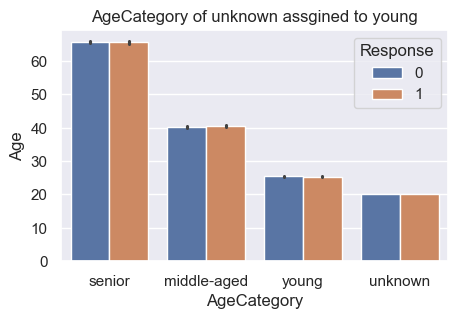

In [9]:
plt.figure(figsize=(5, 3))
sns.barplot(data=df, y='Age', x='AgeCategory', hue='Response')
plt.title("AgeCategory of unknown assgined to young")
plt.show()

#### most of the 'Agecaterogy' that are unknown/nan have a 'Age' that is in the 'Young' range

- the nan/unknown data, will be assign to 'AgeCategory' of young

In [10]:
df['AgeCategory'] = df['AgeCategory'].apply( lambda x : 'young' if x == 'unknown' else x )
df['AgeCategory'].unique()

array(['senior', 'middle-aged', 'young'], dtype=object)

#### Visual Showing that all unknown were assigned to young, because of the age range they fall into

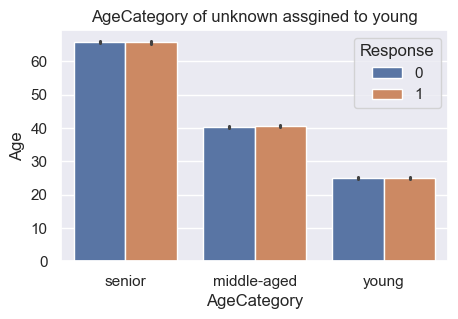

In [11]:
plt.figure(figsize=(5, 3))
sns.barplot(data=df, y='Age', x='AgeCategory', hue='Response')
plt.title("AgeCategory of unknown assgined to young")
plt.show()

### map from text to categorical

In [12]:
age_cat_mapping = {"senior": 1, "middle-aged": 2, "young": 3, "unknown": 4}
age_cat_mapping_rev = {1: "senior", 2: "middle-aged", 3: "young", 4: "unknown"}

df['AgeCategory_'] = df['AgeCategory'].map(age_cat_mapping)
df['AgeCategory_'].astype(int)
# df['AgeCategory_'].isnull().sum()
df.head()

Height  Age  Income  RomanticGestureScore  CompatibilityScore  \
0     156   59    7977                     3                   1   
1     169   32    5842                     0                   1   
2     178   42   17638                     2                   5   
3     164   78    8793                     0                   0   
4     160   35   15262                     6                   0   

   CommunicationScore  DistanceKM  Response  AgeCategory  AgeCategory_  
0                   1          45         1       senior             1  
1                   5          46         1  middle-aged             2  
2                   5          13         0  middle-aged             2  
3                   7          52         0       senior             1  
4                   0           9         1  middle-aged             2

In [13]:
df.dtypes

Height                   int64
Age                      int64
Income                   int64
RomanticGestureScore     int64
CompatibilityScore       int64
CommunicationScore       int64
DistanceKM               int64
Response                 int64
AgeCategory             object
AgeCategory_             int64
dtype: object

### duplicates, check for duplicate values

In [14]:
df.duplicated().sum()

0

# Descriptive Stats

### Drop Objec column

In [15]:
stats_df = df.drop(columns='AgeCategory')
stats_df.head()

Height  Age  Income  RomanticGestureScore  CompatibilityScore  \
0     156   59    7977                     3                   1   
1     169   32    5842                     0                   1   
2     178   42   17638                     2                   5   
3     164   78    8793                     0                   0   
4     160   35   15262                     6                   0   

   CommunicationScore  DistanceKM  Response  AgeCategory_  
0                   1          45         1             1  
1                   5          46         1             2  
2                   5          13         0             2  
3                   7          52         0             1  
4                   0           9         1             2

### Descriptive Statistic

- Mean, Count, Standard Deviation, Max, Min

In [16]:
stats_df.describe()

Height           Age        Income  RomanticGestureScore  \
count  10000.000000  10000.000000  10000.000000          10000.000000   
mean     165.170500     49.878300  12441.388000              4.965000   
std        8.907635     17.599059   4310.645672              3.140376   
min      150.000000     20.000000   5000.000000              0.000000   
25%      157.000000     35.000000   8684.750000              2.000000   
50%      165.000000     50.000000  12432.000000              5.000000   
75%      173.000000     65.000000  16113.250000              8.000000   
max      180.000000     80.000000  19999.000000             10.000000   

       CompatibilityScore  CommunicationScore    DistanceKM      Response  \
count        10000.000000        10000.000000  10000.000000  10000.000000   
mean             4.589000            4.543400     49.879600      0.504700   
std              2.859702            2.870564     28.598155      0.500003   
min              0.000000            0.000000      1.000000      0.000000   
25%              2.000000            2.000000     25.000000      0.000000   
50%              5.000000            5.000000     50.000000      1.000000   
75%              7.000000            7.000000     75.000000      1.000000   
max              9.000000            9.000000     99.000000      1.000000   

       AgeCategory_  
count  10000.000000  
mean       1.691500  
std        0.751654  
min        1.000000  
25%        1.000000  
50%        2.000000  
75%        2.000000  
max        3.000000

### Mean

### quantile ranges

In [17]:
stats_df.quantile([0.25, 0.5, 0.75])

Height   Age    Income  RomanticGestureScore  CompatibilityScore  \
0.25   157.0  35.0   8684.75                   2.0                 2.0   
0.50   165.0  50.0  12432.00                   5.0                 5.0   
0.75   173.0  65.0  16113.25                   8.0                 7.0   

      CommunicationScore  DistanceKM  Response  AgeCategory_  
0.25                 2.0        25.0       0.0           1.0  
0.50                 5.0        50.0       1.0           2.0  
0.75                 7.0        75.0       1.0           2.0

### Data Columns Range

In [18]:
(stats_df.max() - stats_df.min()).to_frame().T

Height  Age  Income  RomanticGestureScore  CompatibilityScore  \
0      30   60   14999                    10                   9   

   CommunicationScore  DistanceKM  Response  AgeCategory_  
0                   9          98         1             2

### Sum Of Each Column

In [19]:
stats_df.sum().to_frame().T

Height     Age     Income  RomanticGestureScore  CompatibilityScore  \
0  1651705  498783  124413880                 49650               45890   

   CommunicationScore  DistanceKM  Response  AgeCategory_  
0               45434      498796      5047         16915

### Z-Score Of Each Value

In [20]:
(stats_df - stats_df.mean()) / stats_df.std()

Height       Age    Income  RomanticGestureScore  CompatibilityScore  \
0    -1.029510  0.518306 -1.035666             -0.625721           -1.255026   
1     0.429912 -1.015867 -1.530951             -1.581021           -1.255026   
2     1.440281 -0.447655  1.205530             -0.944154            0.143721   
3    -0.131404  1.597909 -0.846367             -1.581021           -1.604713   
4    -0.580457 -0.845403  0.654336              0.329578           -1.604713   
...        ...       ...       ...                   ...                 ...   
9995 -0.355931  1.484267 -0.030248             -0.307288           -1.255026   
9996 -0.355931  1.427446 -1.387817              0.648012            1.542468   
9997  0.093122  1.143340 -0.744758              1.284878           -0.205966   
9998  1.215755  1.597909  0.049787              0.966445            1.542468   
9999 -1.029510  1.029697 -1.537911             -1.581021            1.542468   

      CommunicationScore  DistanceKM  Response  AgeCategory_  
0              -1.234391   -0.170626  0.990594     -0.919971  
1               0.159063   -0.135659  0.990594      0.410428  
2               0.159063   -1.289580 -1.009394      0.410428  
3               0.855790    0.074145 -1.009394     -0.919971  
4              -1.582755   -1.429449  0.990594      0.410428  
...                  ...         ...       ...           ...  
9995            0.159063    0.878392  0.990594     -0.919971  
9996           -1.582755    0.074145  0.990594     -0.919971  
9997            0.507426   -0.590234 -1.009394     -0.919971  
9998            0.159063   -0.869972  0.990594     -0.919971  
9999           -0.189301   -1.254612  0.990594     -0.919971  

[10000 rows x 9 columns]

### Mode Value For Each Feature

In [21]:
stats_df.mode()

Height  Age  Income  RomanticGestureScore  CompatibilityScore  \
0     166   32   18394                     4                   9   

   CommunicationScore  DistanceKM  Response  AgeCategory_  
0                   3          45         1             1

### Median Of Each Feature

In [22]:
stats_df.median().to_frame().T

Height   Age   Income  RomanticGestureScore  CompatibilityScore  \
0   165.0  50.0  12432.0                   5.0                 5.0   

   CommunicationScore  DistanceKM  Response  AgeCategory_  
0                 5.0        50.0       1.0           2.0

### Variance Of Each Column

In [23]:
variance = stats_df.var().to_frame().T
variance.columns.name = 'Columns'
variance

Columns     Height         Age        Income  RomanticGestureScore  \
0        79.345964  309.726862  1.858167e+07              9.861961   

Columns  CompatibilityScore  CommunicationScore  DistanceKM  Response  \
0                  8.177897             8.24014  817.854489  0.250003   

Columns  AgeCategory_  
0            0.564984

### Coefficient Of Variation

In [24]:
mean_values = stats_df.mean()
std_values = stats_df.std()
coefficient_of_variation = (std_values / mean_values)
# 
coefficient_of_variation.to_frame().T

Columns   Height      Age    Income  RomanticGestureScore  CompatibilityScore  \
0        0.05393  0.35284  0.346476              0.632503            0.623165   

Columns  CommunicationScore  DistanceKM  Response  AgeCategory_  
0                   0.63181    0.573344  0.990693      0.444371

### Standard Error

In [25]:
standard_errors = stats_df.apply(lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
standard_errors.to_frame().T

Columns    Height       Age     Income  RomanticGestureScore  \
0        0.089076  0.175991  43.106457              0.031404   

Columns  CompatibilityScore  CommunicationScore  DistanceKM  Response  \
0                  0.028597            0.028706    0.285982     0.005   

Columns  AgeCategory_  
0            0.007517

### Kurtosis

In [26]:
# show the kurtosis
stats_df.kurtosis().to_frame().T

Columns  Height       Age    Income  RomanticGestureScore  CompatibilityScore  \
0       -1.1985 -1.204644 -1.183765             -1.200789           -1.205692   

Columns  CommunicationScore  DistanceKM  Response  AgeCategory_  
0                 -1.217565   -1.195692 -2.000046     -1.028459

### Skewness

In [27]:
stats_df.apply(skew).to_frame().T

Columns    Height       Age    Income  RomanticGestureScore  \
0       -0.041903  0.022763  0.011152              0.020818   

Columns  CompatibilityScore  CommunicationScore  DistanceKM  Response  \
0                 -0.033804           -0.013293   -0.008651 -0.018801   

Columns  AgeCategory_  
0            0.573943

### Confidence level

In [28]:
confidence = 0.95
# 
stats_df_mean = stats_df.mean()
n = len(stats_df['Age'])
stderr = stats.sem(stats_df)
interval = stderr * stats.t.ppf( ( 1 + confidence ) / 2.0, n - 1)
# 
(stats_df_mean - interval).round(3).to_frame().T

Columns   Height     Age     Income  RomanticGestureScore  CompatibilityScore  \
0        164.996  49.533  12356.891                 4.903               4.533   

Columns  CommunicationScore  DistanceKM  Response  AgeCategory_  
0                     4.487      49.319     0.495         1.677

In [29]:
(stats_df_mean + interval).round(3).to_frame().T

Columns   Height     Age     Income  RomanticGestureScore  CompatibilityScore  \
0        165.345  50.223  12525.885                 5.027               4.645   

Columns  CommunicationScore  DistanceKM  Response  AgeCategory_  
0                       4.6       50.44     0.515         1.706

### Age Frequency Distribution

In [30]:
age_bin = stats_df['Age'][stats_df['Age'] % 10 == 0].unique()
age_bin.sort()
age_bin

array([20, 30, 40, 50, 60, 70, 80])

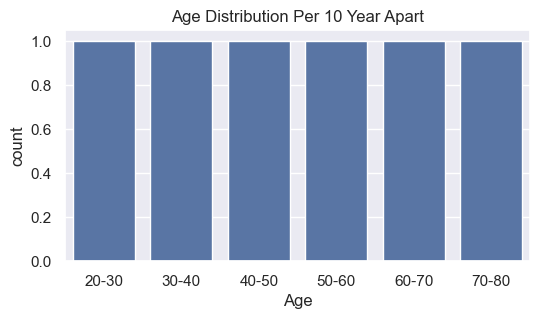

In [31]:
age_freq_dist = pd.cut(stats_df['Age'], bins=age_bin, labels=['20-30', "30-40", '40-50', '50-60', '60-70', '70-80'] ).value_counts().sort_index()

plt.figure(figsize=(6, 3))
sns.countplot(age_freq_dist)
plt.title("Age Distribution Per 10 Year Apart")
plt.show()

# Data Visualisation

### Add a column for textual

In [32]:
response_ = {1:"Accecpted", 0:"Rejected"}
# 
df['target'] = df['Response'].map(response_)
df.head()

Height  Age  Income  RomanticGestureScore  CompatibilityScore  \
0     156   59    7977                     3                   1   
1     169   32    5842                     0                   1   
2     178   42   17638                     2                   5   
3     164   78    8793                     0                   0   
4     160   35   15262                     6                   0   

   CommunicationScore  DistanceKM  Response  AgeCategory  AgeCategory_  \
0                   1          45         1       senior             1   
1                   5          46         1  middle-aged             2   
2                   5          13         0  middle-aged             2   
3                   7          52         0       senior             1   
4                   0           9         1  middle-aged             2   

      target  
0  Accecpted  
1  Accecpted  
2   Rejected  
3   Rejected  
4  Accecpted

### Responses Distribution

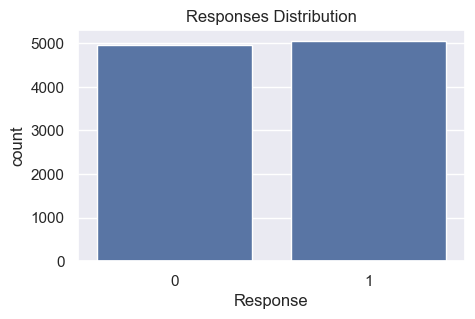

In [33]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Response')
plt.title("Responses Distribution")
plt.show()

### Show Relationship Between Age Category and the Age

<Figure size 500x200 with 0 Axes>

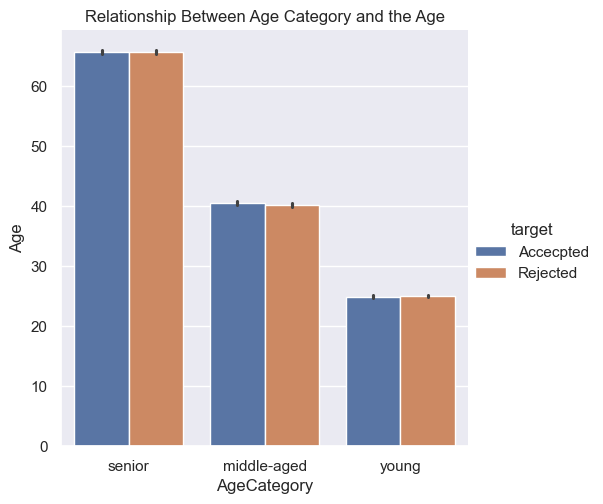

In [34]:
plt.figure(figsize=(5, 2))
sns.catplot(data=df, x='AgeCategory', y='Age', hue='target', kind='bar')
# plt.tight_layout()
plt.title("Relationship Between Age Category and the Age")
# plt.legend()
plt.show()

### Relationship between Income and Age Category

<Figure size 1500x400 with 0 Axes>

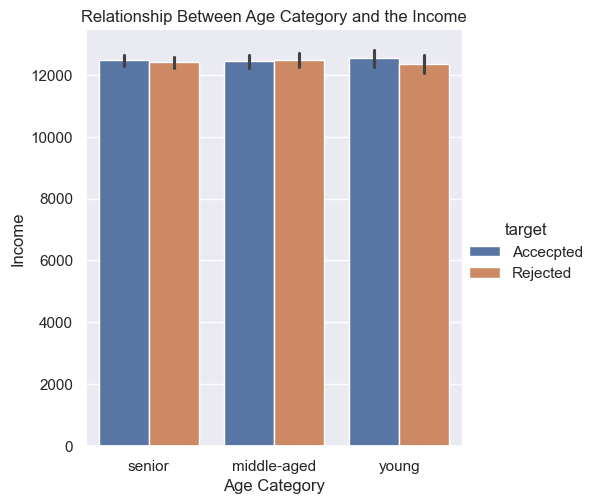

In [35]:
plt.figure(figsize=(15, 4))
sns.catplot(data=df, x='AgeCategory', y='Income', hue='target', kind='bar')
# plt.tight_layout()
plt.title("Relationship Between Age Category and the Income")
plt.xlabel("Age Category")
plt.ylabel("Income")
plt.show()

### Effect of Income on Response

In [36]:
df['Income']

0        7977
1        5842
2       17638
3        8793
4       15262
        ...  
9995    12311
9996     6459
9997     9231
9998    12656
9999     5812
Name: Income, Length: 10000, dtype: int64

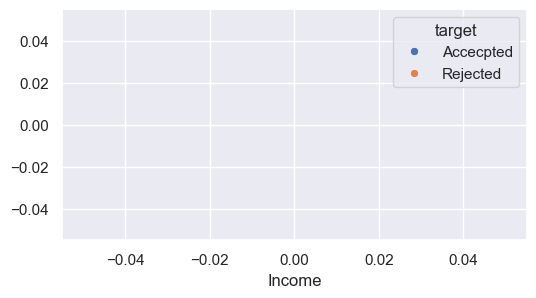

In [37]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df, x='Income', hue='target')
# plt.legend(loc=5)
plt.show()

### Show the effect of distance in the response
- max distance : 99KM
- min distance : 1KM
- from the data, the distance affect the respose, not completely, because distance of 45KM was the most rejected
- the most accepted where a distance less than 7KM

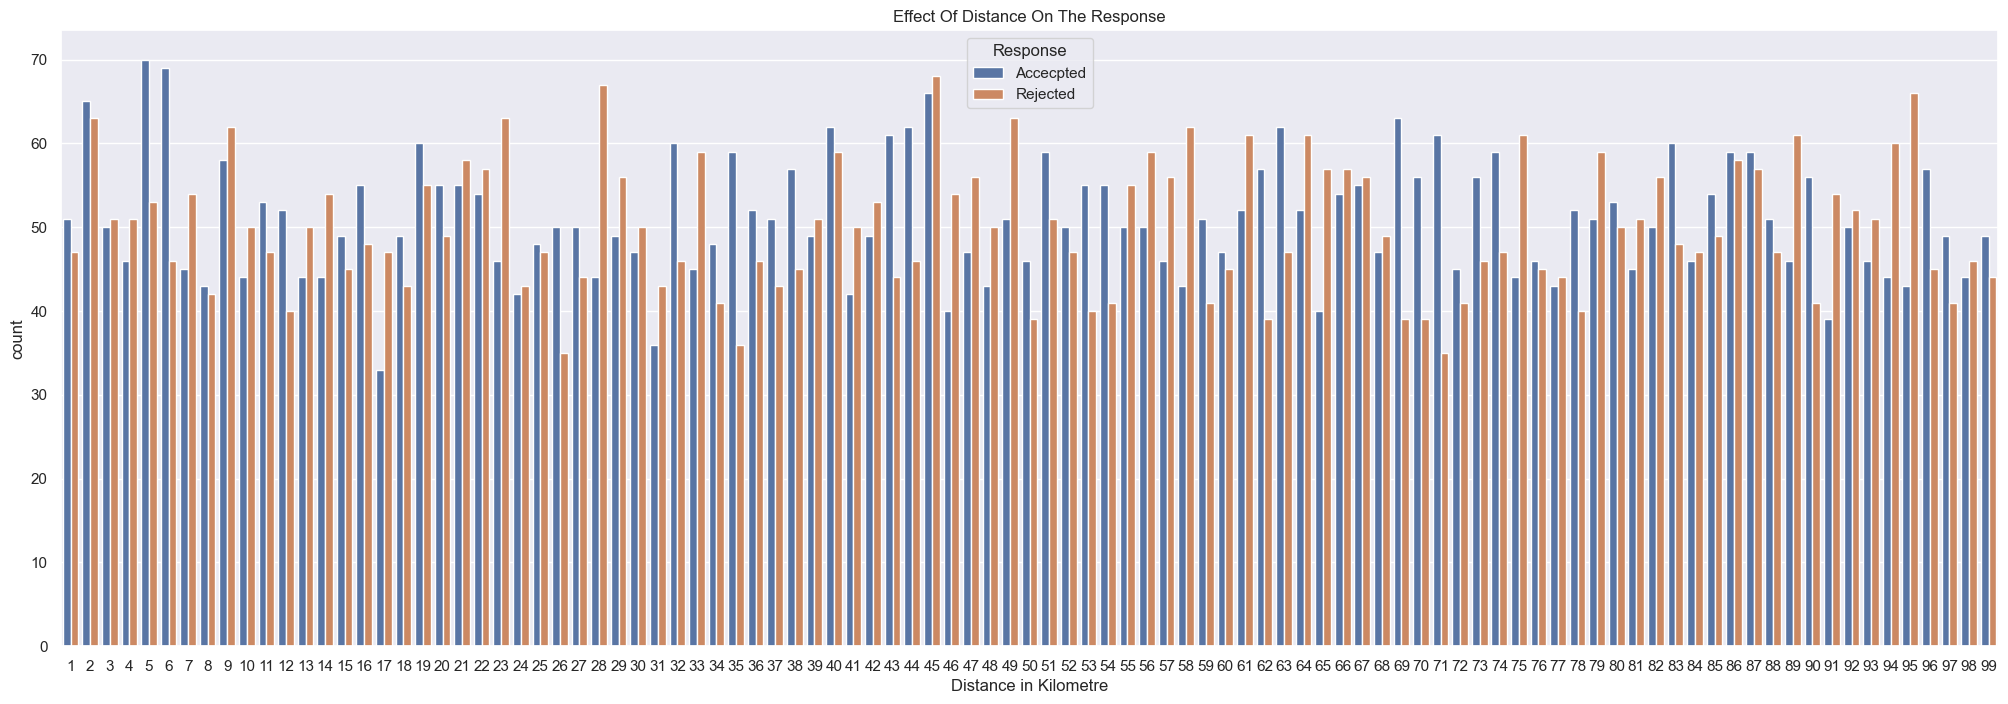

In [38]:
plt.figure(figsize=(25, 8))
sns.countplot(data=df, x='DistanceKM', hue='target')
plt.title("Effect Of Distance On The Response")
plt.xlabel("Distance in Kilometre")
plt.legend(title="Response", loc=9)
plt.show()

### show effect of communication on the response

- from the groph below, people with communication score of 9, where most accepted, but not the least rejected

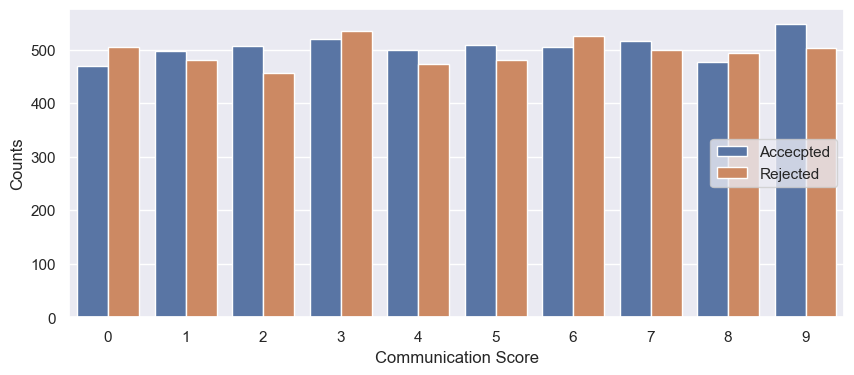

In [39]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='CommunicationScore', hue='target')
plt.xlabel("Communication Score")
plt.ylabel("Counts" )
plt.legend(loc=5)
plt.show()

### Effect of Compatibility Score on the response

- high compatibility score doesnt mean an acceptance will happen ... as most compatible people where rejected

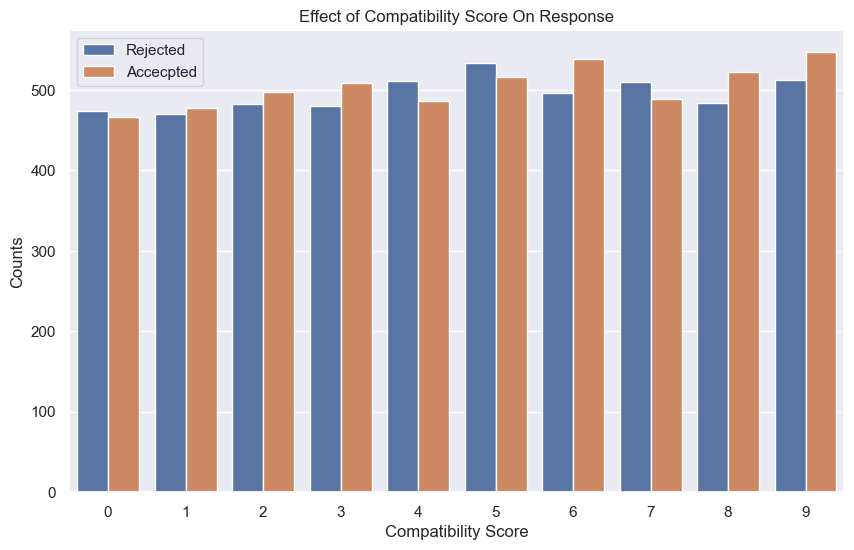

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CompatibilityScore', hue='target')
plt.title("Effect of Compatibility Score On Response")
plt.ylabel("Counts")
plt.xlabel("Compatibility Score")
plt.legend(loc=2)
plt.show()

### Effect Of Romantic Gestures on Response

- been romantic doesnt guarantee an acceptance

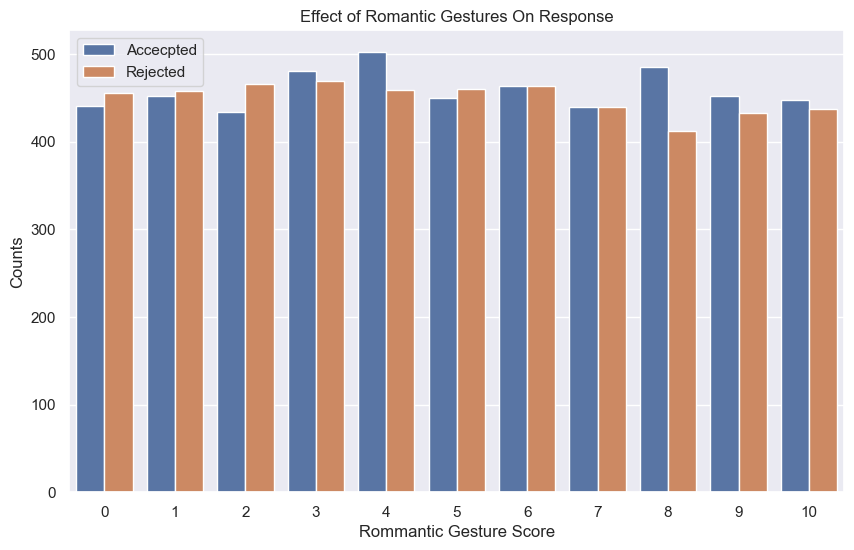

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RomanticGestureScore', hue='target')
plt.title("Effect of Romantic Gestures On Response")
plt.xlabel("Rommantic Gesture Score")
plt.ylabel("Counts")
plt.legend(loc=2)
plt.show()

### KDE - Kernel Density Estimation

- i used this method to show the underlying distribution of each column of the dataset, except the Response column

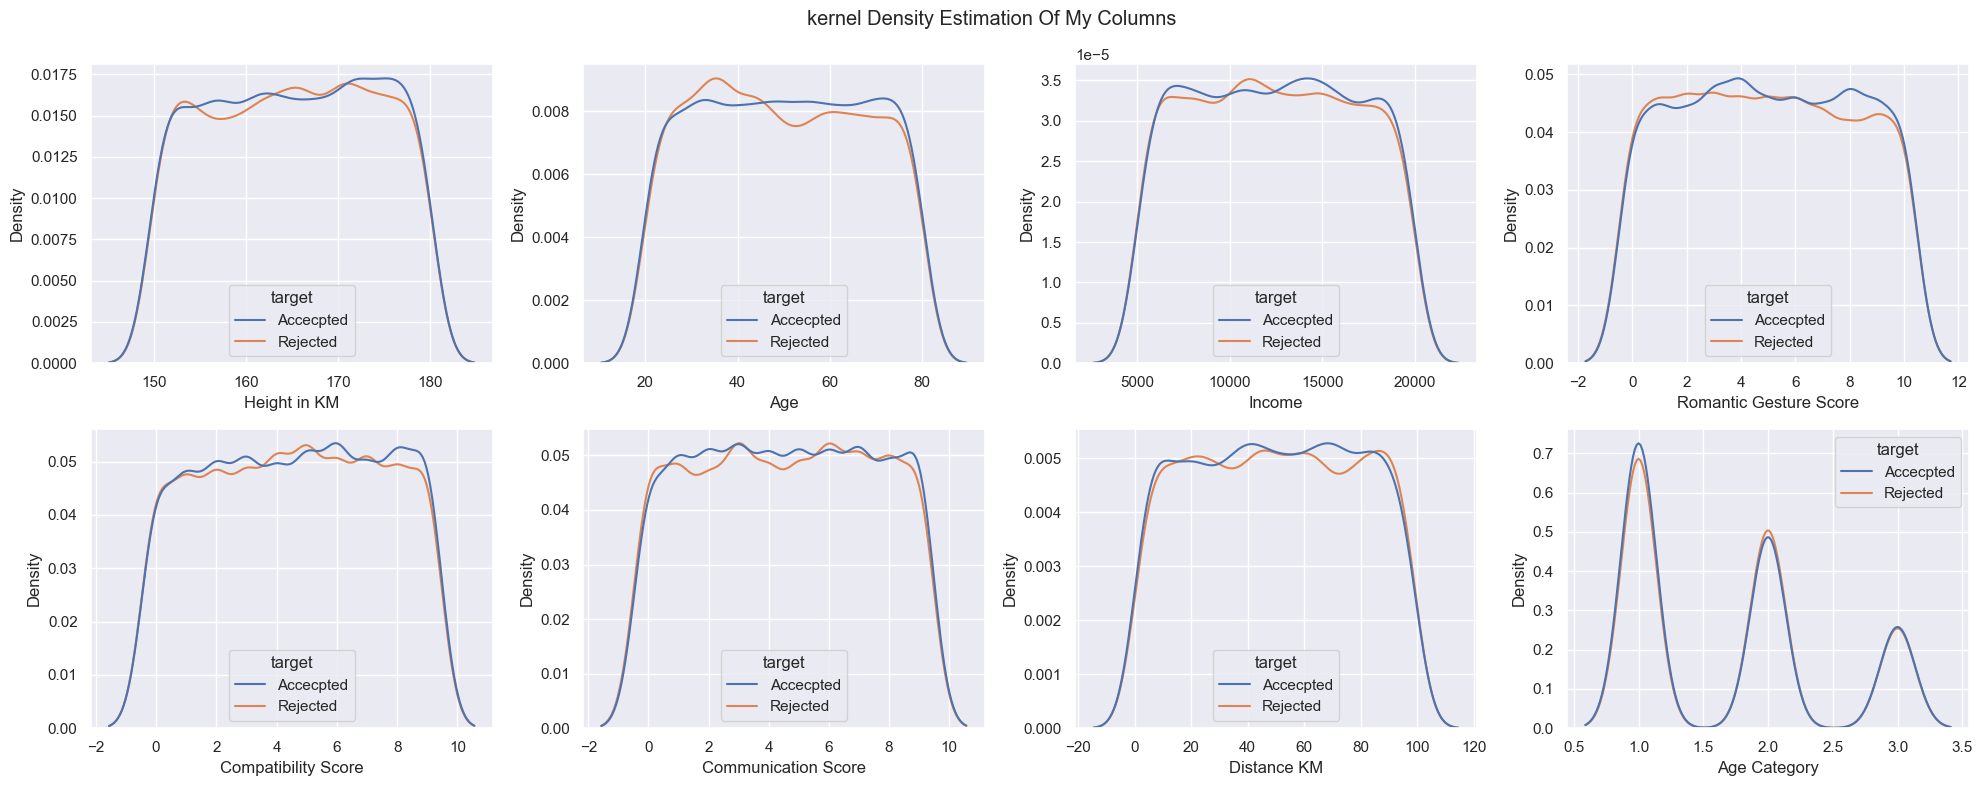

In [71]:
# columns to plot, formated to best fit my axes loop
col_to_plot = [
    { "col": "Height", "title":"Height", "xlabel": "Height in KM" },
    { "col": "Age", "title":"Age", "xlabel": "Age" },
    { "col": "Income", "title":"Income", "xlabel": "Income" },
    { "col": "RomanticGestureScore", "title":"Romantic Gesture Score", "xlabel": "Romantic Gesture Score" },
    
    { "col": "CompatibilityScore", "title":"Compatibility Score", "xlabel": "Compatibility Score" },
    { "col": "CommunicationScore", "title":"Communication Score", "xlabel": "Communication Score" },
    { "col": "DistanceKM", "title":"Distance KM", "xlabel": "Distance KM" },
    { "col": "AgeCategory_", "title":"Age Category", "xlabel": "Age Category" },
    
]

# make subplots of 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

axes = axes.flatten() # to go/loop over them

for i, ax in enumerate(axes):
    sns.kdeplot(data=df, x=col_to_plot[i]['col'], hue='target', ax=ax)
    # ax.set_title(f"{col_to_plot[i]['title']}")
    ax.set_xlabel(f"{col_to_plot[i]['xlabel']}")
    

fig.suptitle("kernel Density Estimation Of My Columns")
# plt.title("Kernel Density Estimation Of My Columns")
plt.tight_layout()
# plt.legend()
plt.show()


### Rel

<Figure size 600x300 with 0 Axes>

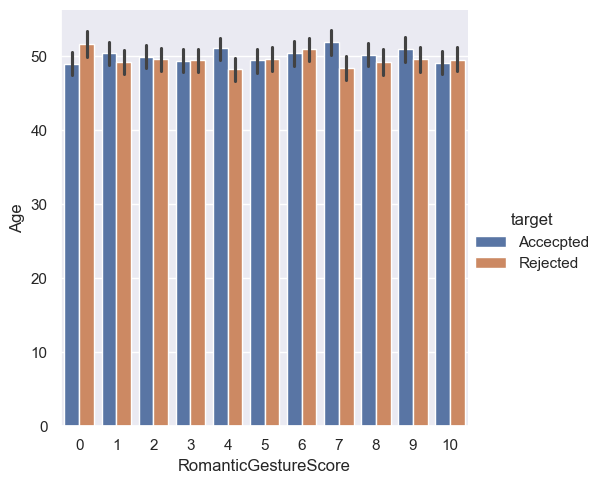

In [44]:
plt.figure(figsize=(6, 3))
sns.catplot(data=df, x='RomanticGestureScore', y='Age', hue='target', kind='bar')
plt.show()

### Kurtosis

In [45]:
kurtosis_value = df['Income'].kurtosis()
kurtosis_value
# plt.bar('Income', kurtosis_value)
# plt.show()

-1.1837654366048853

### Pair plot

not a good diagram view, but show the relationship between each column with other column like corr does

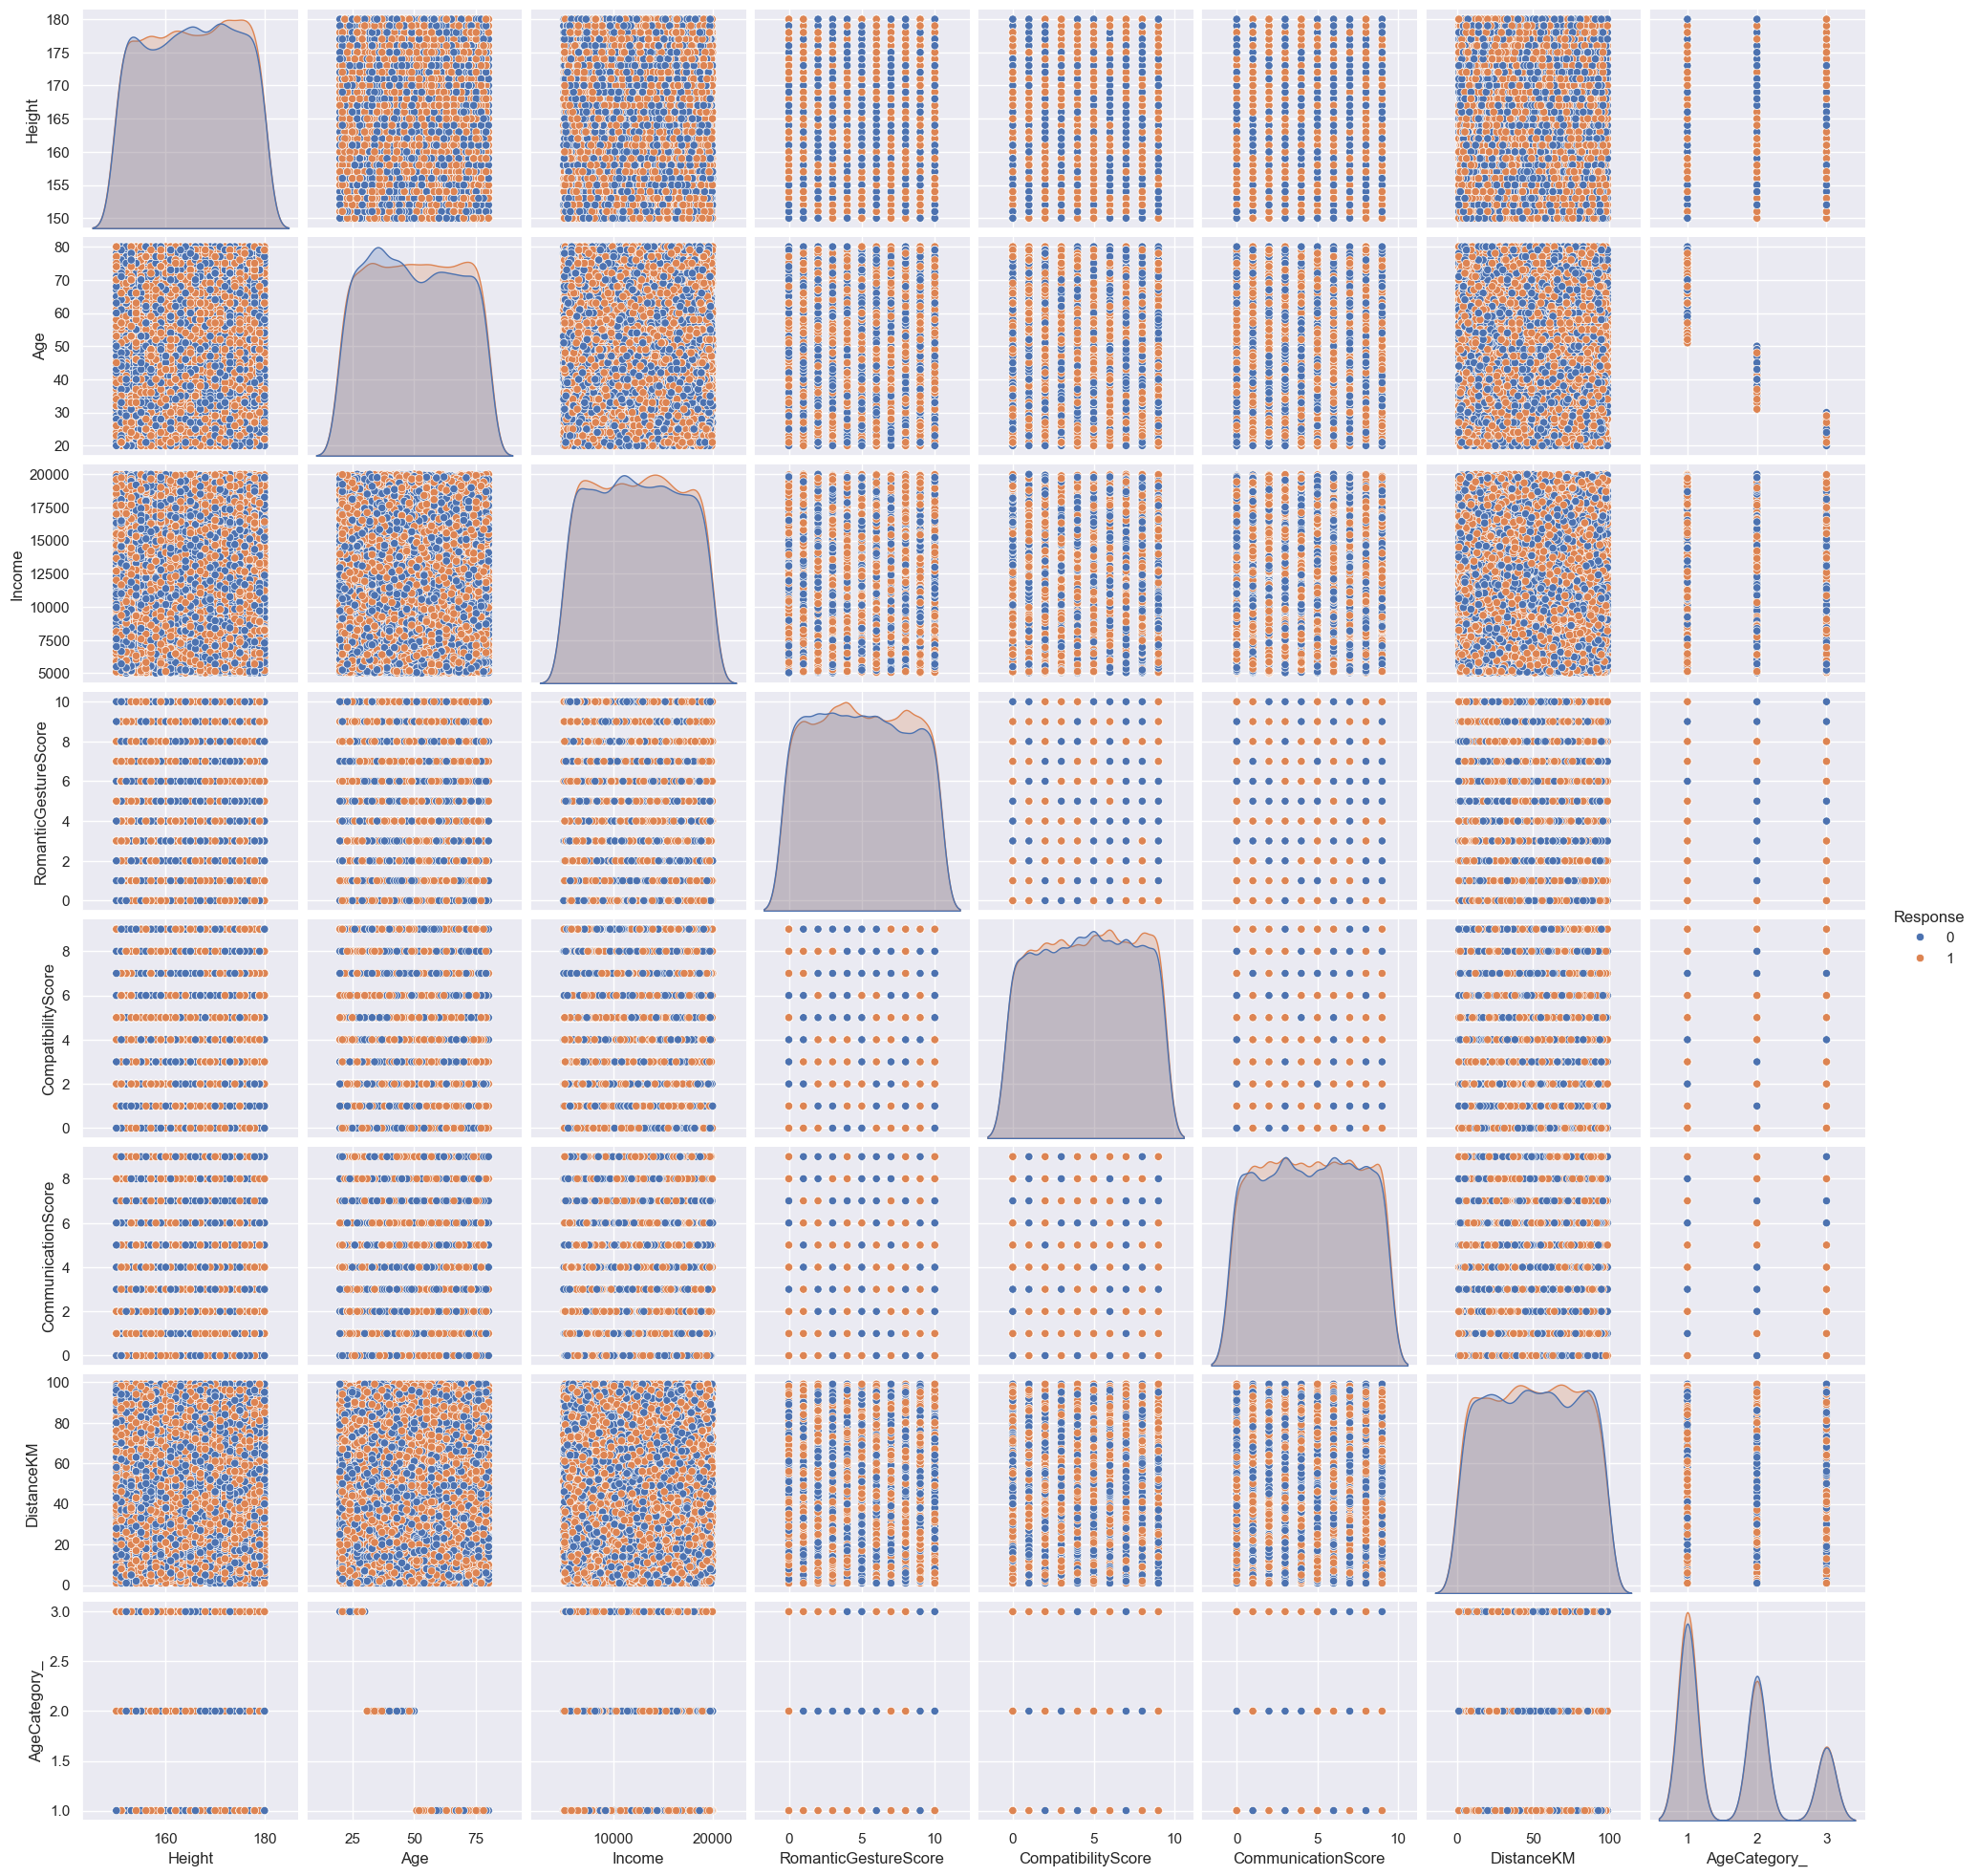

In [46]:
sns.pairplot(data=stats_df, hue='Response', kind='scatter')
# plt.title("Pair Plot Of My Dataset")
plt.show()

### Skewness

### Variance

### Pie Chart of any combination

### Boxplot


### Whiskerplot

### Correlation Coefficient

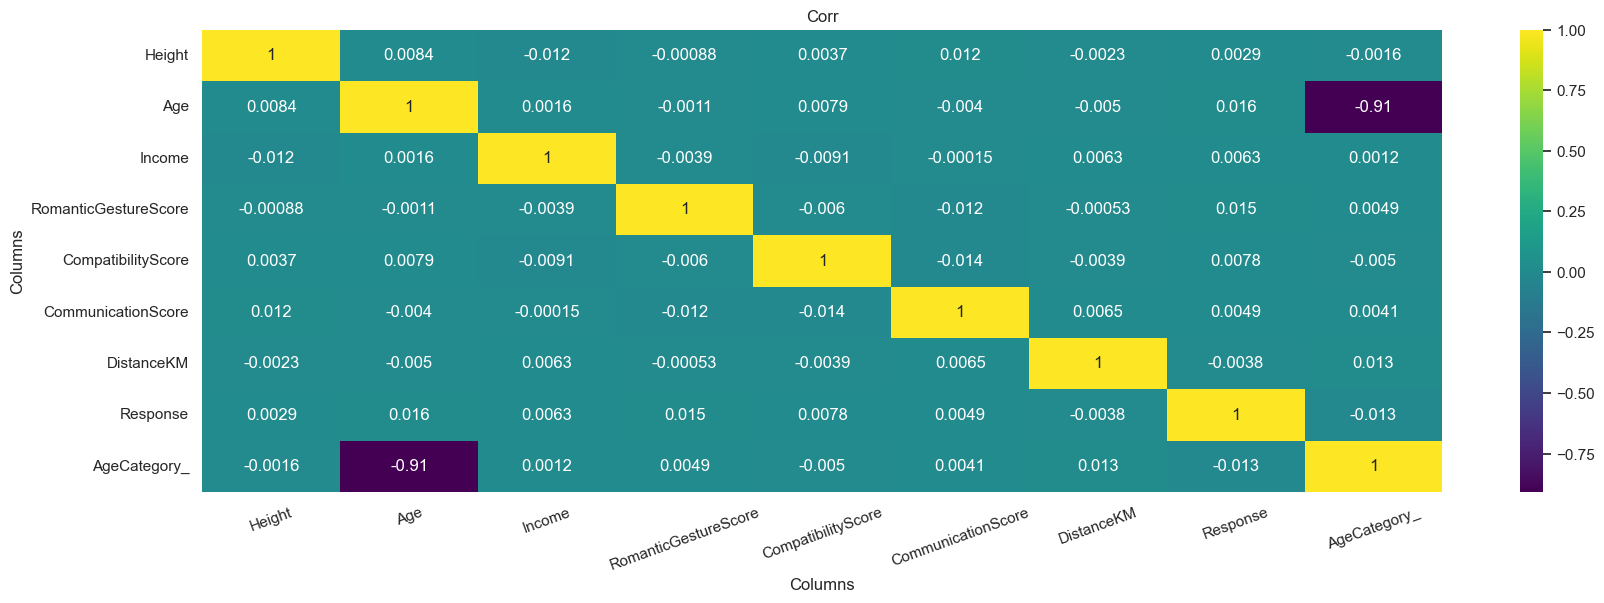

In [47]:
plt.figure(figsize=(20, 6))
# mask = np.triu(np.ones_like(stats_df.corr(), dtype=bool))
sns.heatmap(stats_df.corr(), annot=True, 
            cmap='viridis', 
            # mask=mask
            )
plt.xticks(rotation=20)
plt.title("Corr")
plt.show()

### regression plot

# Reflection Of Data

# Conclusion

# Interesting article I have been reading about

- https://huggingface.co/blog/rlhf

# Bonus